In [11]:
import random
import math
import matplotlib.pyplot as plt

class Player:
    def __init__(self, name, max_budget, optimism, patience, aggressiveness, strategicness, risk_tolerance):
        self.name = name
        self.max_budget = max_budget  # Maksymalny kapitał gracza
        self.budget = max_budget  # Aktualny stan kapitału gracza
        self.passed = False  # Flaga informująca, czy gracz spasował
        self.optimism = optimism  # Optymizm gracza
        self.patience = patience  # Poziom cierpliwości gracza
        self.aggressiveness = aggressiveness  # Poziom agresywności gracza
        self.strategicness = strategicness  # Poziom strategiczności gracza
        self.risk_tolerance = risk_tolerance  # Poziom tolerancji na ryzyko gracza
        self.bid_history = []  # Historia decyzji gracza

    def bid(self, current_bid, previous_raise, remaining_players):
        if not self.passed:
            if self.budget >= current_bid + previous_raise:
                bid_amount = self.minmax(current_bid, previous_raise, remaining_players)
                self.bid_history.append(bid_amount)  # Dodanie aktualnej decyzji do historii
                return bid_amount
            else:
                self.passed = True
                print(f"{self.name} nie ma wystarczających środków i pasuje.")
                return None
        else:
            return None

    def minmax(self, current_bid, previous_raise, remaining_players):
        best_bid = current_bid
        best_utility = float('-inf')
        for raise_amount in range(1, min(self.max_budget - current_bid, 10) + 1):
            bid_amount = current_bid + raise_amount
            utility = self.utility(bid_amount, remaining_players)
            if utility > best_utility:
                best_bid = bid_amount
                best_utility = utility
        self.budget = self.max_budget - best_bid
        return best_bid

    def utility(self, bid_amount, remaining_players):
        # Obliczenie wartości użyteczności podbicia oferty
        # Wartość użyteczności zależy od cech gracza, takich jak optymizm, cierpliwość, agresywność itp.
        utility = random.uniform(0, 1)  # Bazujemy na losowej wartości

        # Uwzględnienie optymizmu
        utility *= self.optimism

        # Uwzględnienie cierpliwości
        utility *= self.patience

        # Uwzględnienie agresywności
        utility *= self.aggressiveness

        # Uwzględnienie strategiczności
        utility *= self.strategicness

        # Uwzględnienie tolerancji na ryzyko
        utility *= self.risk_tolerance

        return utility

class Auction:
    def __init__(self, auction_number, players, item, starting_bid):
        self.players = players
        self.auction_number = auction_number
        self.current_bid = starting_bid
        self.previous_raise = 0
        self.winning_player = None
        self.item = item

    def play(self):
        print(f"Rozpoczynamy licytację przedmiotu: {self.item}")
        print(f"Początkowa stawka: {self.current_bid}")
        round_number = 1  # Numer rundy licytacji
        while True:
            remaining_players = [player for player in self.players if not player.passed]
            if len(remaining_players) == 1:
                winning_player = remaining_players[0]
                print(f"{winning_player.name} wygrywa licytację przedmiotu: {self.item} o stawce: {self.current_bid}. KONIEC AUKCJI.")
                print(f"Pozostały budżet dla {winning_player.name}: {winning_player.budget}")
                self.plot_bid_history()  # Wyświetlenie wykresów historii decyzji graczy
                return

            remaining_players = [player for player in self.players if player.budget >= self.current_bid + self.previous_raise and not player.passed]
            if not remaining_players:
                print("Wszyscy pozostali gracze nie mogą podbić stawki. KONIEC AUKCJI.")
                self.plot_bid_history()  # Wyświetlenie wykresów historii decyzji graczy
                return
            
            print(f"\nRunda licytacji {round_number}:")
            for player in self.players:
                bid = player.bid(self.current_bid, self.previous_raise, remaining_players)
                if bid is not None and bid > self.current_bid:
                    print(f"{player.name} zwiększa wartość licytacji do: {bid} (Wartość podbicia: {bid - self.current_bid})")
                    self.current_bid = bid
                    self.winning_player = player
                    self.previous_raise = bid - self.current_bid
            print("\nPozostałe budżety:")
            for player in self.players:
                print(f"{player.name}: {player.budget}")          
            print("\n")
            round_number += 1

    def plot_bid_history(self):
        for player in self.players:
            plt.plot(range(1, len(player.bid_history) + 1), player.bid_history, label=player.name)
        plt.xlabel('Numer rundy')
        plt.ylabel('Wartość stawki')
        plt.title(f'Aukcja #{self.auction_number}')
        plt.grid()
        plt.legend()
        #plt.show()





In [12]:
def count_avg_bid(auctions, auctions_number):
    for i in range(len(auctions)):
        print(f"Auction #{i+1}")
        print(f"{auctions[i].players[0].name} - Budget = {auctions[i].players[0].budget} - Historia decyzji: {auctions[i].players[0].bid_history}")
        print(f"{auctions[i].players[1].name} - Budget = {auctions[i].players[1].budget} - Historia decyzji: {auctions[i].players[1].bid_history}")
        print(f"{auctions[i].players[2].name} - Budget = {auctions[i].players[2].budget} - Historia decyzji: {auctions[i].players[2].bid_history}")
        print("")


    total_bid = []
    for player in auctions[0].players:
        total_bid.append([0])

    for i in range(len(auctions[0].players)):
        for j in range(len(auctions)):
            for x in range(len(auctions[j].players[i].bid_history)):
                if len(total_bid[i]) > x:
                    total_bid[i][x] += auctions[j].players[i].bid_history[x]
                else:
                    total_bid[i].append(auctions[j].players[i].bid_history[x])
                    
    print(f"Total bid przed poprawą {total_bid}")
    old_total_bid = total_bid

    '''
    for bid in total_bid:
        pop_list = []
        for i in range(len(bid) - 1):
            if bid[i] > bid[i+1]:
                pop_list.append(i+1)
        for i in range(len(pop_list)):
            bid.pop(pop_list[-(i+1)])
    '''     

    bid_length = []
    for i in range(len(auctions[0].players)):
        bid_length.append(len(auctions[0].players[i].bid_history))

    for j in range(len(auctions)):
        for i in range(len(auctions[j].players)):
            if bid_length[i] > len(auctions[j].players[i].bid_history):
                bid_length[i] = len(auctions[j].players[i].bid_history)

    fixed_bid = []
    for player_bid, length in zip(total_bid, bid_length):
        fixed_bid.append([])
        for i in range(len(player_bid)):
            if i < length:
                fixed_bid[-1].append(player_bid[i])
            

                
    print(f"Total_bid {fixed_bid}")

    avg_bid = []
    for one_bid in fixed_bid:
        avg_bid.append([x/auctions_number for x in one_bid])

    print(avg_bid)  
    
    return avg_bid

In [13]:
item = "Magiczny Miecz"
asking_price = 10

#### Symulacja przy stałych parametrach graczy

Różne budżety różne wartości parameterów

Rozpoczynamy licytację przedmiotu: Magiczny Miecz
Początkowa stawka: 10

Runda licytacji 1:
Rafal zwiększa wartość licytacji do: 17 (Wartość podbicia: 7)
Kuba zwiększa wartość licytacji do: 18 (Wartość podbicia: 1)
Grzegorz zwiększa wartość licytacji do: 26 (Wartość podbicia: 8)

Pozostałe budżety:
Rafal: 103
Kuba: 72
Grzegorz: 94



Runda licytacji 2:
Rafal zwiększa wartość licytacji do: 30 (Wartość podbicia: 4)
Kuba zwiększa wartość licytacji do: 38 (Wartość podbicia: 8)
Grzegorz zwiększa wartość licytacji do: 42 (Wartość podbicia: 4)

Pozostałe budżety:
Rafal: 90
Kuba: 52
Grzegorz: 78



Runda licytacji 3:
Rafal zwiększa wartość licytacji do: 47 (Wartość podbicia: 5)
Kuba zwiększa wartość licytacji do: 56 (Wartość podbicia: 9)
Grzegorz zwiększa wartość licytacji do: 65 (Wartość podbicia: 9)

Pozostałe budżety:
Rafal: 73
Kuba: 34
Grzegorz: 55



Runda licytacji 4:
Rafal zwiększa wartość licytacji do: 67 (Wartość podbicia: 2)
Kuba nie ma wystarczających środków i pasuje.
Grzegorz nie 

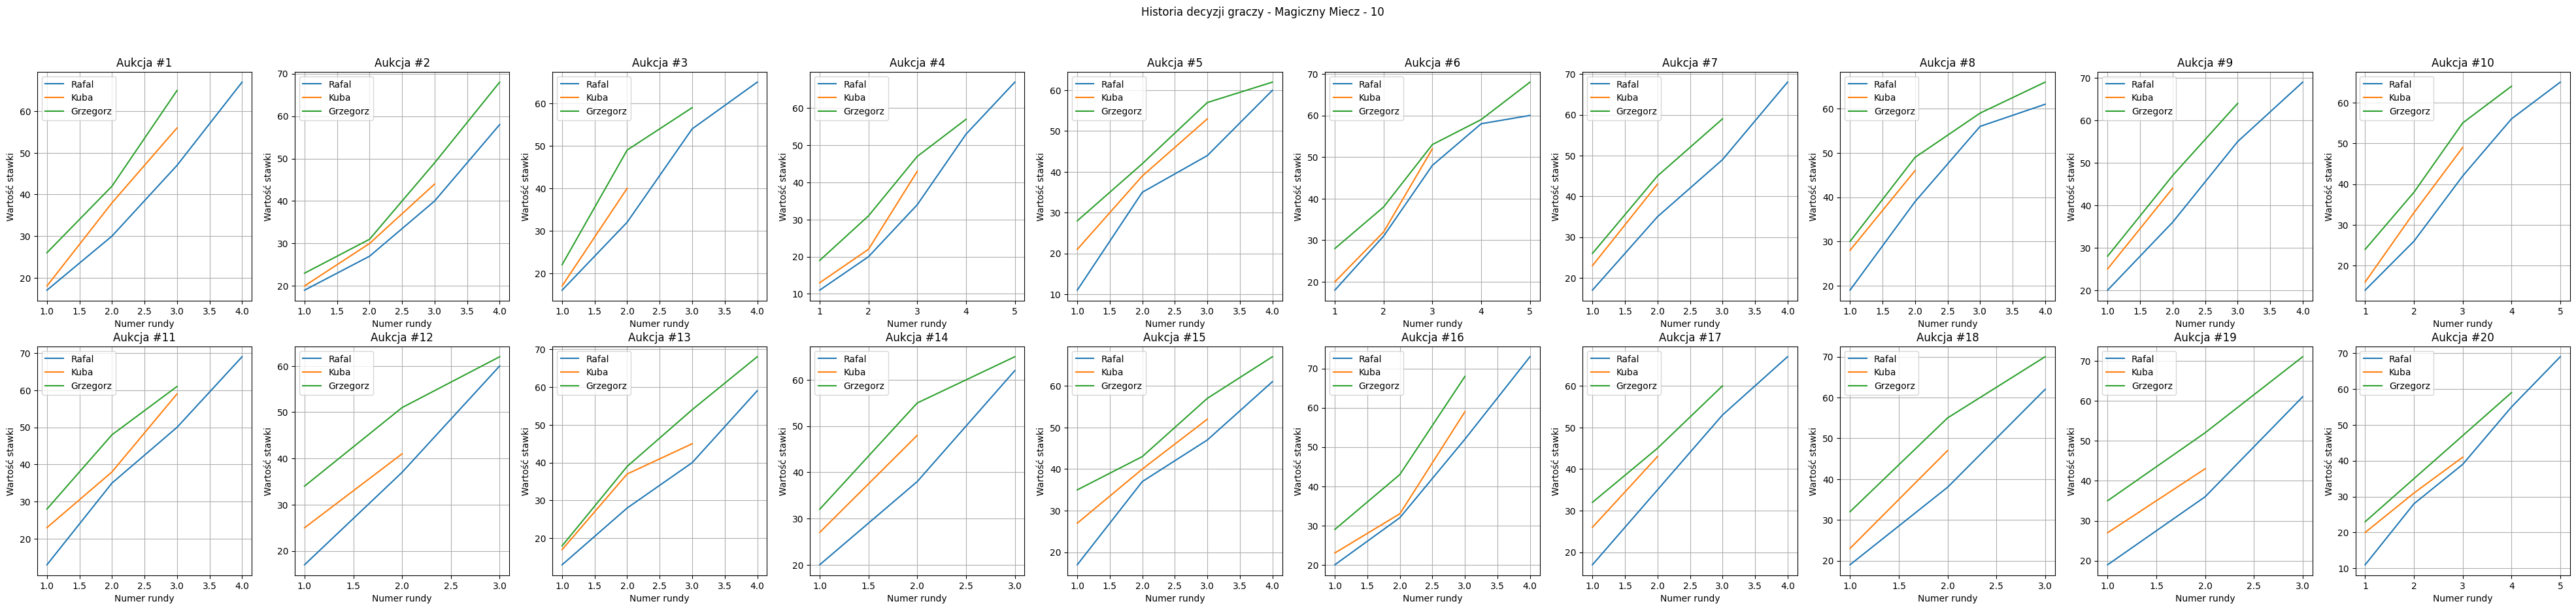

Auction #1
Rafal - Budget = 53 - Historia decyzji: [17, 30, 47, 67]
Kuba - Budget = 34 - Historia decyzji: [18, 38, 56]
Grzegorz - Budget = 55 - Historia decyzji: [26, 42, 65]

Auction #2
Rafal - Budget = 62 - Historia decyzji: [19, 27, 40, 58]
Kuba - Budget = 46 - Historia decyzji: [20, 30, 44]
Grzegorz - Budget = 52 - Historia decyzji: [23, 31, 49, 68]

Auction #3
Rafal - Budget = 55 - Historia decyzji: [16, 32, 54, 65]
Kuba - Budget = 50 - Historia decyzji: [17, 40]
Grzegorz - Budget = 61 - Historia decyzji: [22, 49, 59]

Auction #4
Rafal - Budget = 53 - Historia decyzji: [11, 20, 34, 53, 67]
Kuba - Budget = 47 - Historia decyzji: [13, 22, 43]
Grzegorz - Budget = 63 - Historia decyzji: [19, 31, 47, 57]

Auction #5
Rafal - Budget = 60 - Historia decyzji: [11, 35, 44, 60]
Kuba - Budget = 37 - Historia decyzji: [21, 39, 53]
Grzegorz - Budget = 58 - Historia decyzji: [28, 42, 57, 62]

Auction #6
Rafal - Budget = 60 - Historia decyzji: [18, 31, 48, 58, 60]
Kuba - Budget = 38 - Historia d

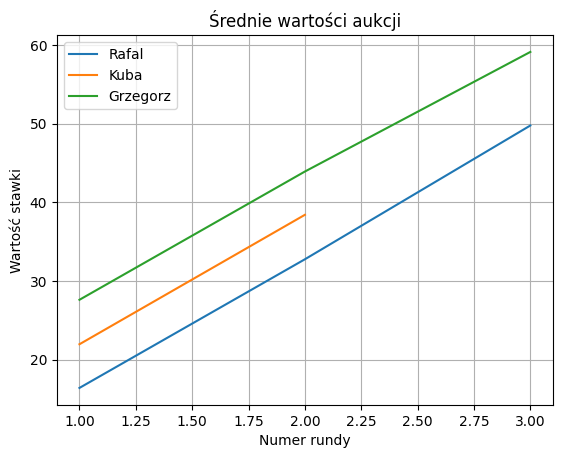

In [14]:
# Tworzenie aukcji i uruchomienie symulacji przy stałych parametrach graczy
auctions = []
auctions_number = 20
plot_rows = 2

plt.figure(figsize=(5*auctions_number/plot_rows, 5*plot_rows))

for i in range(auctions_number):
    plt.subplot(plot_rows, int(math.ceil(auctions_number/plot_rows)), i+1)
    #Atrybuty (imie, kapital, optymizm, cierpliwosc, agresywnosc, strategicznosc, ryzyko)
    auctions.append(Auction(i+1, [Player("Rafal", 120, 0.8, 0.7, 1.0, 1.0, 0.9), 
                                Player("Kuba", 90, 0.6, 0.8, 0.9, 1.0, 0.8), 
                                Player("Grzegorz", 120, 0.5, 0.6, 0.7, 1.0, 0.7)], 
                                item, asking_price))
    auctions[i].play()
plt.suptitle(f"Historia decyzji graczy - {item} - {asking_price}")
plt.show()

avg_bid = count_avg_bid(auctions, auctions_number)

for i in range(len(auctions[0].players)):
    plt.plot(range(1, len(avg_bid[i]) + 1), avg_bid[i], label=auctions[0].players[i].name)
plt.xlabel('Numer rundy')
plt.ylabel('Wartość stawki')
plt.title(f'Średnie wartości aukcji')
plt.grid()
plt.legend()
plt.show()


Te same budżety, różne cechy


Rozpoczynamy licytację przedmiotu: Magiczny Miecz
Początkowa stawka: 10

Runda licytacji 1:
Rafal zwiększa wartość licytacji do: 12 (Wartość podbicia: 2)
Kuba zwiększa wartość licytacji do: 14 (Wartość podbicia: 2)
Grzegorz zwiększa wartość licytacji do: 16 (Wartość podbicia: 2)

Pozostałe budżety:
Rafal: 108
Kuba: 106
Grzegorz: 104



Runda licytacji 2:
Rafal zwiększa wartość licytacji do: 17 (Wartość podbicia: 1)
Kuba zwiększa wartość licytacji do: 21 (Wartość podbicia: 4)
Grzegorz zwiększa wartość licytacji do: 29 (Wartość podbicia: 8)

Pozostałe budżety:
Rafal: 103
Kuba: 99
Grzegorz: 91



Runda licytacji 3:
Rafal zwiększa wartość licytacji do: 34 (Wartość podbicia: 5)
Kuba zwiększa wartość licytacji do: 39 (Wartość podbicia: 5)
Grzegorz zwiększa wartość licytacji do: 40 (Wartość podbicia: 1)

Pozostałe budżety:
Rafal: 86
Kuba: 81
Grzegorz: 80



Runda licytacji 4:
Rafal zwiększa wartość licytacji do: 50 (Wartość podbicia: 10)
Kuba zwiększa wartość licytacji do: 54 (Wartość podbici

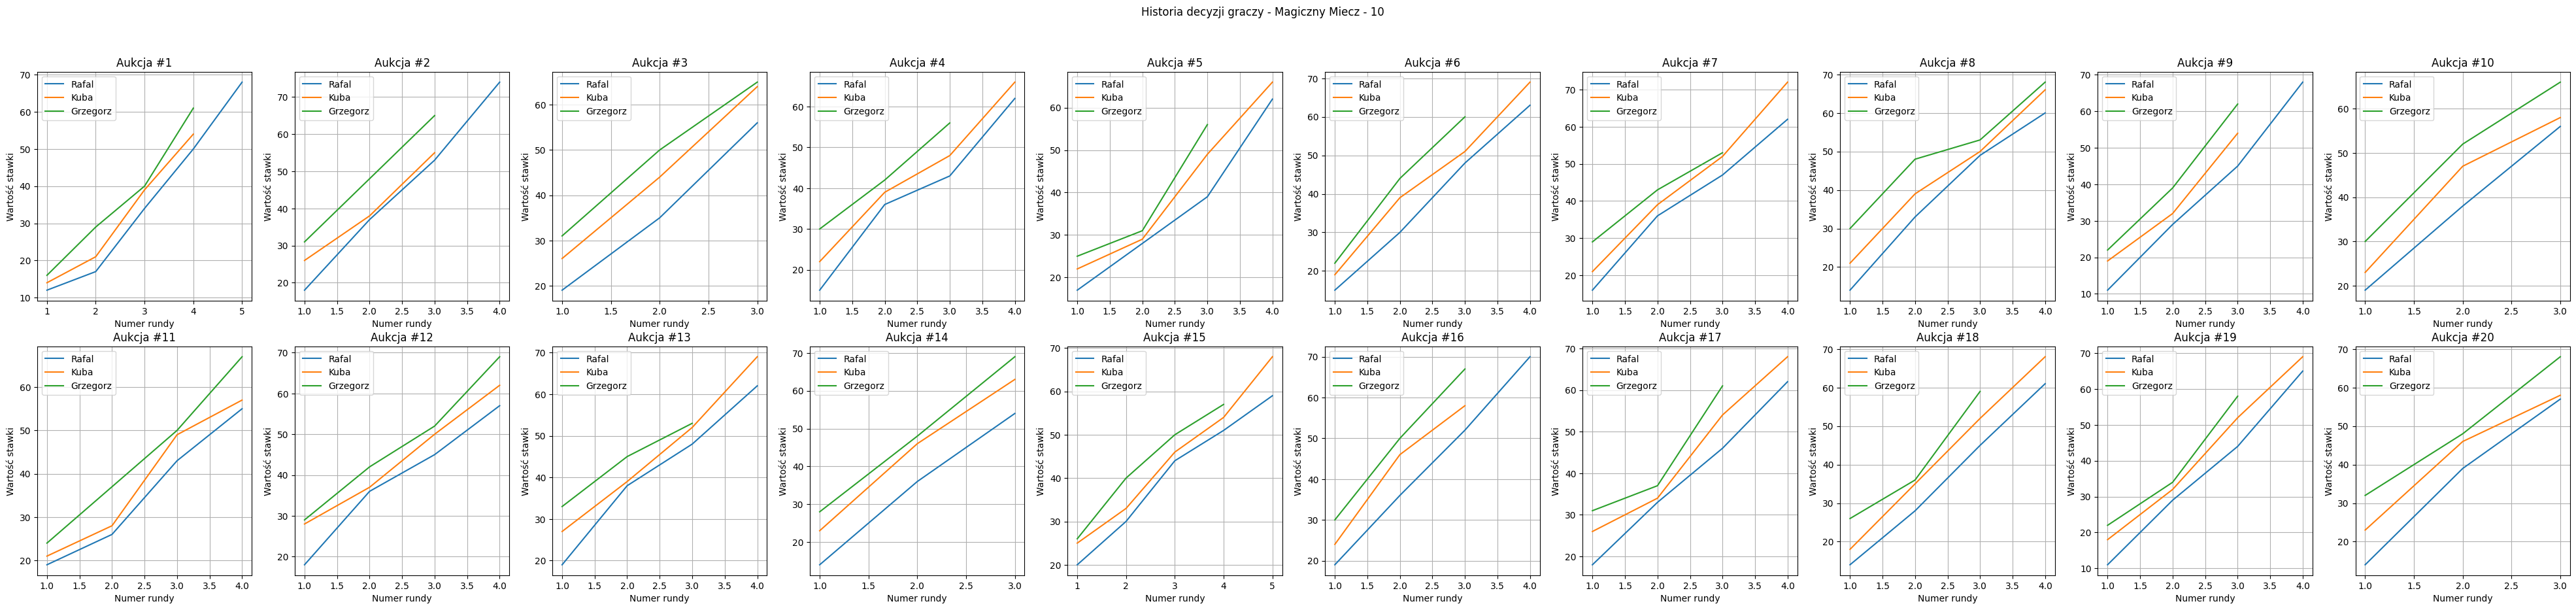

Auction #1
Rafal - Budget = 52 - Historia decyzji: [12, 17, 34, 50, 68]
Kuba - Budget = 66 - Historia decyzji: [14, 21, 39, 54]
Grzegorz - Budget = 59 - Historia decyzji: [16, 29, 40, 61]

Auction #2
Rafal - Budget = 46 - Historia decyzji: [18, 37, 53, 74]
Kuba - Budget = 65 - Historia decyzji: [26, 38, 55]
Grzegorz - Budget = 55 - Historia decyzji: [31, 48, 65]

Auction #3
Rafal - Budget = 64 - Historia decyzji: [19, 35, 56]
Kuba - Budget = 56 - Historia decyzji: [26, 44, 64]
Grzegorz - Budget = 55 - Historia decyzji: [31, 50, 65]

Auction #4
Rafal - Budget = 58 - Historia decyzji: [15, 36, 43, 62]
Kuba - Budget = 54 - Historia decyzji: [22, 39, 48, 66]
Grzegorz - Budget = 64 - Historia decyzji: [30, 42, 56]

Auction #5
Rafal - Budget = 58 - Historia decyzji: [17, 28, 39, 62]
Kuba - Budget = 54 - Historia decyzji: [22, 29, 49, 66]
Grzegorz - Budget = 64 - Historia decyzji: [25, 31, 56]

Auction #6
Rafal - Budget = 57 - Historia decyzji: [15, 30, 48, 63]
Kuba - Budget = 51 - Historia d

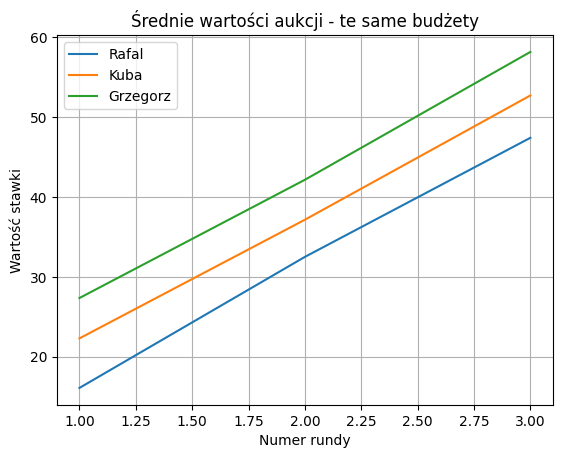

In [15]:
# Tworzenie aukcji i uruchomienie symulacji przy stałych parametrach graczy
auctions = []
auctions_number = 20
plot_rows = 2

plt.figure(figsize=(5*auctions_number/plot_rows, 5*plot_rows))

for i in range(auctions_number):
    plt.subplot(plot_rows, int(math.ceil(auctions_number/plot_rows)), i+1)
    #Atrybuty (imie, kapital, optymizm, cierpliwosc, agresywnosc, strategicznosc, ryzyko)
    auctions.append(Auction(i+1, [Player("Rafal", 120, 0.8, 0.7, 1.0, 1.0, 0.9), 
                                Player("Kuba", 120, 0.6, 0.8, 0.9, 1.0, 0.8), 
                                Player("Grzegorz", 120, 0.5, 0.6, 0.7, 1.0, 0.7)], 
                                item, asking_price))
    auctions[i].play()
plt.suptitle(f"Historia decyzji graczy - {item} - {asking_price}")
plt.show()

avg_bid = count_avg_bid(auctions, auctions_number)

for i in range(len(auctions[0].players)):
    plt.plot(range(1, len(avg_bid[i]) + 1), avg_bid[i], label=auctions[0].players[i].name)
plt.xlabel('Numer rundy')
plt.ylabel('Wartość stawki')
plt.title(f'Średnie wartości aukcji - te same budżety')
plt.grid()
plt.legend()
plt.show()

Rozpoczynamy licytację przedmiotu: Magiczny Miecz
Początkowa stawka: 10

Runda licytacji 1:
Rafal zwiększa wartość licytacji do: 11 (Wartość podbicia: 1)
Kuba zwiększa wartość licytacji do: 15 (Wartość podbicia: 4)
Grzegorz zwiększa wartość licytacji do: 16 (Wartość podbicia: 1)

Pozostałe budżety:
Rafal: 109
Kuba: 105
Grzegorz: 104



Runda licytacji 2:
Rafal zwiększa wartość licytacji do: 17 (Wartość podbicia: 1)
Kuba zwiększa wartość licytacji do: 19 (Wartość podbicia: 2)
Grzegorz zwiększa wartość licytacji do: 20 (Wartość podbicia: 1)

Pozostałe budżety:
Rafal: 103
Kuba: 101
Grzegorz: 100



Runda licytacji 3:
Rafal zwiększa wartość licytacji do: 21 (Wartość podbicia: 1)
Kuba zwiększa wartość licytacji do: 23 (Wartość podbicia: 2)
Grzegorz zwiększa wartość licytacji do: 24 (Wartość podbicia: 1)

Pozostałe budżety:
Rafal: 99
Kuba: 97
Grzegorz: 96



Runda licytacji 4:
Rafal zwiększa wartość licytacji do: 25 (Wartość podbicia: 1)
Kuba zwiększa wartość licytacji do: 28 (Wartość podbic

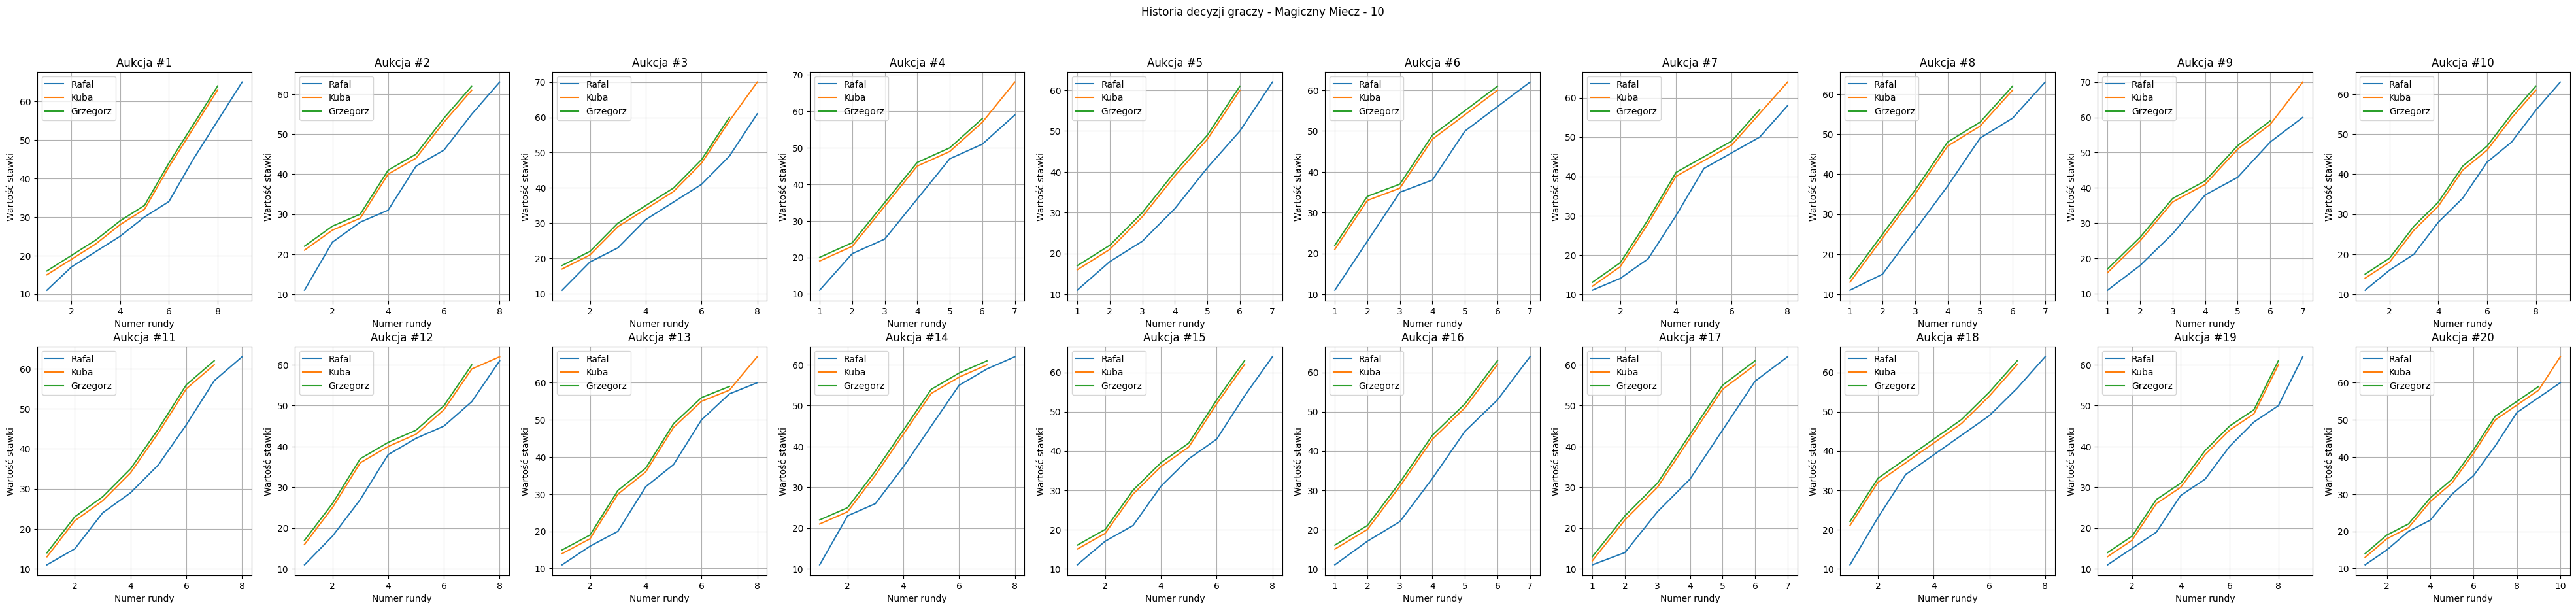

Auction #1
Rafal - Budget = 55 - Historia decyzji: [11, 17, 21, 25, 30, 34, 45, 55, 65]
Kuba - Budget = 57 - Historia decyzji: [15, 19, 23, 28, 32, 43, 53, 63]
Grzegorz - Budget = 56 - Historia decyzji: [16, 20, 24, 29, 33, 44, 54, 64]

Auction #2
Rafal - Budget = 57 - Historia decyzji: [11, 23, 28, 31, 42, 46, 55, 63]
Kuba - Budget = 59 - Historia decyzji: [21, 26, 29, 40, 44, 53, 61]
Grzegorz - Budget = 58 - Historia decyzji: [22, 27, 30, 41, 45, 54, 62]

Auction #3
Rafal - Budget = 59 - Historia decyzji: [11, 19, 23, 31, 36, 41, 49, 61]
Kuba - Budget = 50 - Historia decyzji: [17, 21, 29, 34, 39, 47, 59, 70]
Grzegorz - Budget = 60 - Historia decyzji: [18, 22, 30, 35, 40, 48, 60]

Auction #4
Rafal - Budget = 61 - Historia decyzji: [11, 21, 25, 36, 47, 51, 59]
Kuba - Budget = 52 - Historia decyzji: [19, 23, 34, 45, 49, 57, 68]
Grzegorz - Budget = 62 - Historia decyzji: [20, 24, 35, 46, 50, 58]

Auction #5
Rafal - Budget = 58 - Historia decyzji: [11, 18, 23, 31, 41, 50, 62]
Kuba - Budge

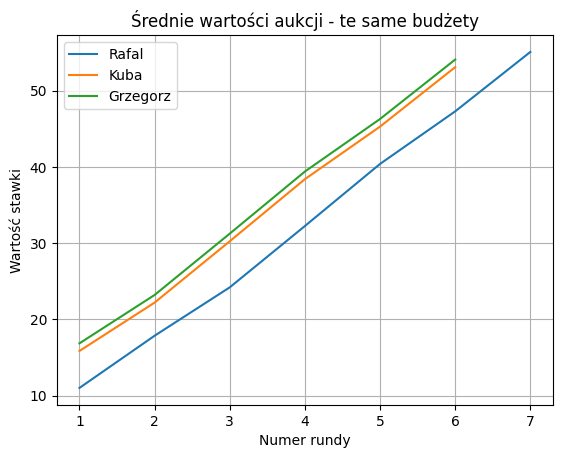

In [16]:
# Tworzenie aukcji i uruchomienie symulacji przy stałych parametrach graczy
auctions = []
auctions_number = 20
plot_rows = 2

plt.figure(figsize=(5*auctions_number/plot_rows, 5*plot_rows))

for i in range(auctions_number):
    plt.subplot(plot_rows, int(math.ceil(auctions_number/plot_rows)), i+1)
    #Atrybuty (imie, kapital, optymizm, cierpliwosc, agresywnosc, strategicznosc, ryzyko)
    auctions.append(Auction(i+1, [Player("Rafal", 120, 0.0, 0.0, 0.0, 0.0, 0.0), 
                                Player("Kuba", 120, 1.0, 1.0, 1.0, 1.0, 1.0), 
                                Player("Grzegorz", 120, 0.0, 0.0, 0.0, 0.0, 0.0)], 
                                item, asking_price))
    auctions[i].play()
plt.suptitle(f"Historia decyzji graczy - {item} - {asking_price}")
plt.show()

avg_bid = count_avg_bid(auctions, auctions_number)

for i in range(len(auctions[0].players)):
    plt.plot(range(1, len(avg_bid[i]) + 1), avg_bid[i], label=auctions[0].players[i].name)
plt.xlabel('Numer rundy')
plt.ylabel('Wartość stawki')
plt.title(f'Średnie wartości aukcji - te same budżety')
plt.grid()
plt.legend()
plt.show()

Gracz z najniższym budżetem ma najwyższe wartości atrybutów

Rozpoczynamy licytację przedmiotu: Magiczny Miecz
Początkowa stawka: 10

Runda licytacji 1:
Rafal zwiększa wartość licytacji do: 11 (Wartość podbicia: 1)
Kuba zwiększa wartość licytacji do: 19 (Wartość podbicia: 8)
Grzegorz zwiększa wartość licytacji do: 28 (Wartość podbicia: 9)

Pozostałe budżety:
Rafal: 109
Kuba: 71
Grzegorz: 92



Runda licytacji 2:
Rafal zwiększa wartość licytacji do: 29 (Wartość podbicia: 1)
Kuba zwiększa wartość licytacji do: 38 (Wartość podbicia: 9)
Grzegorz zwiększa wartość licytacji do: 41 (Wartość podbicia: 3)

Pozostałe budżety:
Rafal: 91
Kuba: 52
Grzegorz: 79



Runda licytacji 3:
Rafal zwiększa wartość licytacji do: 42 (Wartość podbicia: 1)
Kuba zwiększa wartość licytacji do: 45 (Wartość podbicia: 3)
Grzegorz zwiększa wartość licytacji do: 49 (Wartość podbicia: 4)

Pozostałe budżety:
Rafal: 78
Kuba: 45
Grzegorz: 71



Runda licytacji 4:
Rafal zwiększa wartość licytacji do: 50 (Wartość podbicia: 1)
Kuba nie ma wystarczających środków i pasuje.
Grzegorz zwię

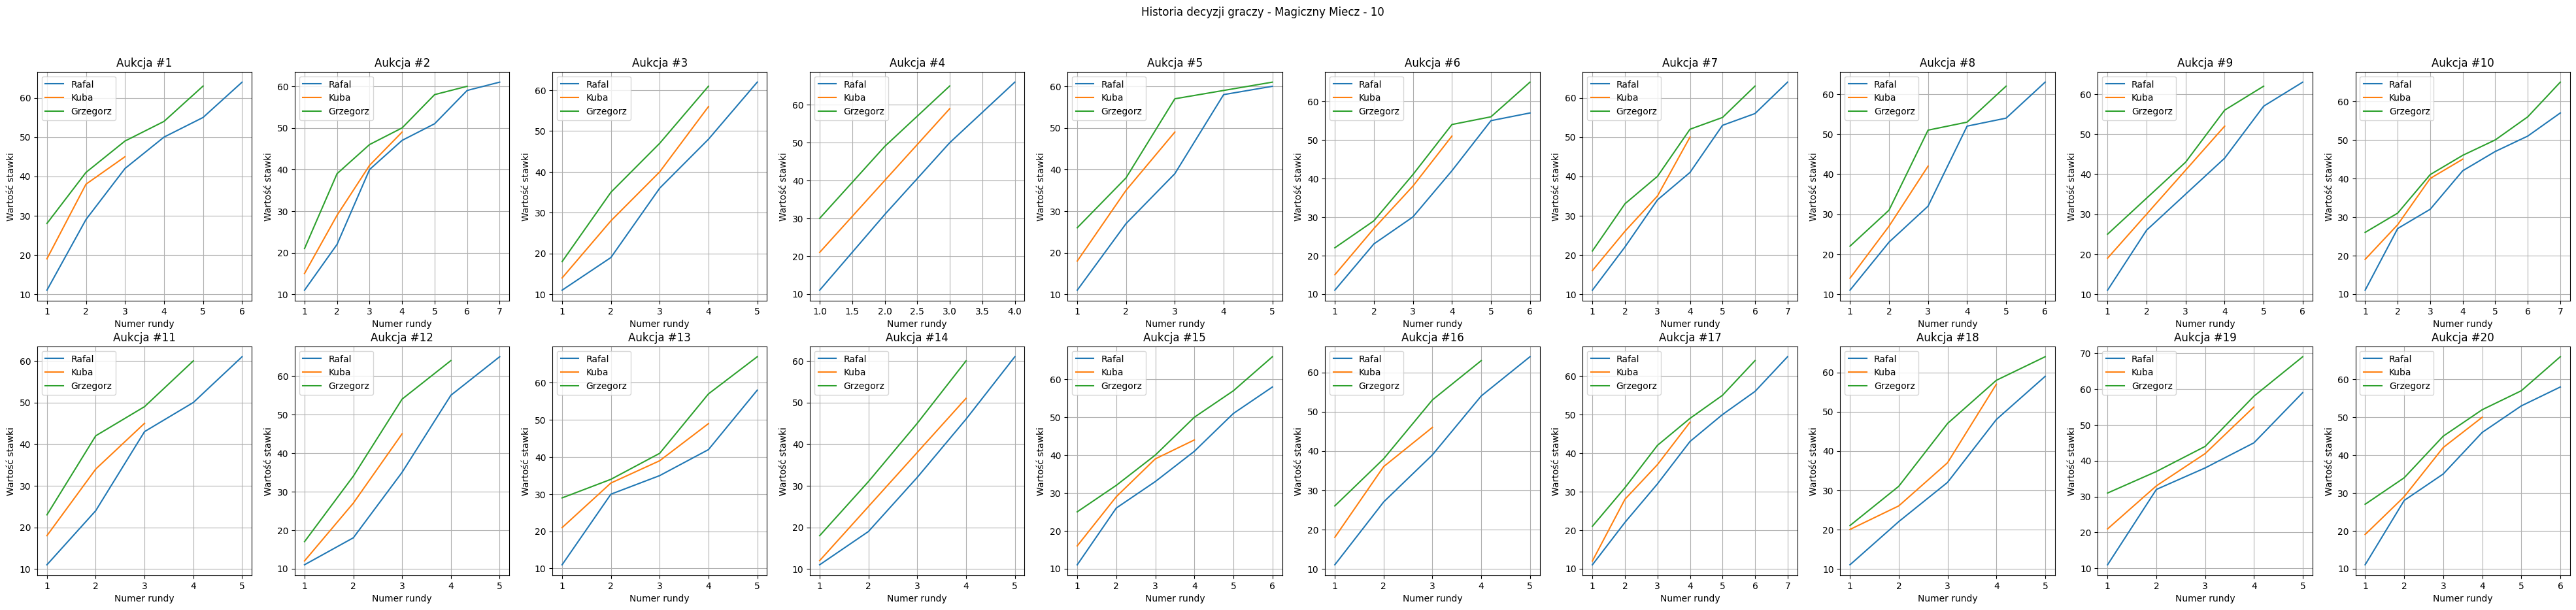

Auction #1
Rafal - Budget = 56 - Historia decyzji: [11, 29, 42, 50, 55, 64]
Kuba - Budget = 45 - Historia decyzji: [19, 38, 45]
Grzegorz - Budget = 57 - Historia decyzji: [28, 41, 49, 54, 63]

Auction #2
Rafal - Budget = 59 - Historia decyzji: [11, 22, 40, 47, 51, 59, 61]
Kuba - Budget = 41 - Historia decyzji: [15, 29, 41, 49]
Grzegorz - Budget = 60 - Historia decyzji: [21, 39, 46, 50, 58, 60]

Auction #3
Rafal - Budget = 58 - Historia decyzji: [11, 19, 36, 48, 62]
Kuba - Budget = 34 - Historia decyzji: [14, 28, 40, 56]
Grzegorz - Budget = 59 - Historia decyzji: [18, 35, 47, 61]

Auction #4
Rafal - Budget = 54 - Historia decyzji: [11, 31, 50, 66]
Kuba - Budget = 31 - Historia decyzji: [21, 40, 59]
Grzegorz - Budget = 55 - Historia decyzji: [30, 49, 65]

Auction #5
Rafal - Budget = 60 - Historia decyzji: [11, 27, 39, 58, 60]
Kuba - Budget = 41 - Historia decyzji: [18, 35, 49]
Grzegorz - Budget = 59 - Historia decyzji: [26, 38, 57, 59, 61]

Auction #6
Rafal - Budget = 63 - Historia decyz

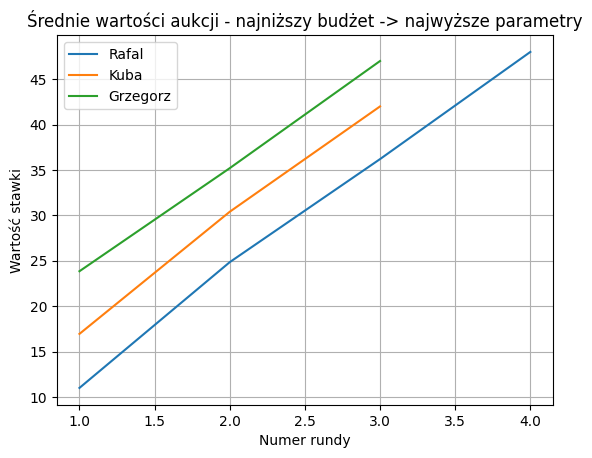

In [17]:
# Tworzenie aukcji i uruchomienie symulacji przy stałych parametrach graczy
auctions = []
auctions_number = 20
plot_rows = 2

plt.figure(figsize=(5*auctions_number/plot_rows, 5*plot_rows))

for i in range(auctions_number):
    plt.subplot(plot_rows, int(math.ceil(auctions_number/plot_rows)), i+1)
    #Atrybuty (imie, kapital, optymizm, cierpliwosc, agresywnosc, strategicznosc, ryzyko)
    auctions.append(Auction(i+1, [Player("Rafal", 120, 0.0, 0.0, 0.0, 0.0, 0.0), 
                                Player("Kuba", 90, 1.0, 1.0, 1.0, 1.0, 1.0), 
                                Player("Grzegorz", 120, 0.5, 0.6, 0.7, 1.0, 0.7)], 
                                item, asking_price))
    auctions[i].play()
plt.suptitle(f"Historia decyzji graczy - {item} - {asking_price}")
plt.show()

avg_bid = count_avg_bid(auctions, auctions_number)

for i in range(len(auctions[0].players)):
    plt.plot(range(1, len(avg_bid[i]) + 1), avg_bid[i], label=auctions[0].players[i].name)
plt.xlabel('Numer rundy')
plt.ylabel('Wartość stawki')
plt.title(f'Średnie wartości aukcji - najniższy budżet -> najwyższe parametry')
plt.grid()
plt.legend()
plt.show()

#### Symulacja przy zmiennych parametrach graczy

Rozpoczynamy licytację przedmiotu: Magiczny Miecz
Początkowa stawka: 10

Runda licytacji 1:
Rafal zwiększa wartość licytacji do: 13 (Wartość podbicia: 3)
Kuba zwiększa wartość licytacji do: 14 (Wartość podbicia: 1)
Grzegorz zwiększa wartość licytacji do: 24 (Wartość podbicia: 10)

Pozostałe budżety:
Rafal: 971
Kuba: 331
Grzegorz: 740



Runda licytacji 2:
Rafal zwiększa wartość licytacji do: 28 (Wartość podbicia: 4)
Kuba zwiększa wartość licytacji do: 29 (Wartość podbicia: 1)
Grzegorz zwiększa wartość licytacji do: 35 (Wartość podbicia: 6)

Pozostałe budżety:
Rafal: 956
Kuba: 316
Grzegorz: 729



Runda licytacji 3:
Rafal zwiększa wartość licytacji do: 44 (Wartość podbicia: 9)
Kuba zwiększa wartość licytacji do: 46 (Wartość podbicia: 2)
Grzegorz zwiększa wartość licytacji do: 49 (Wartość podbicia: 3)

Pozostałe budżety:
Rafal: 940
Kuba: 299
Grzegorz: 715



Runda licytacji 4:
Rafal zwiększa wartość licytacji do: 51 (Wartość podbicia: 2)
Kuba zwiększa wartość licytacji do: 60 (Wartość po

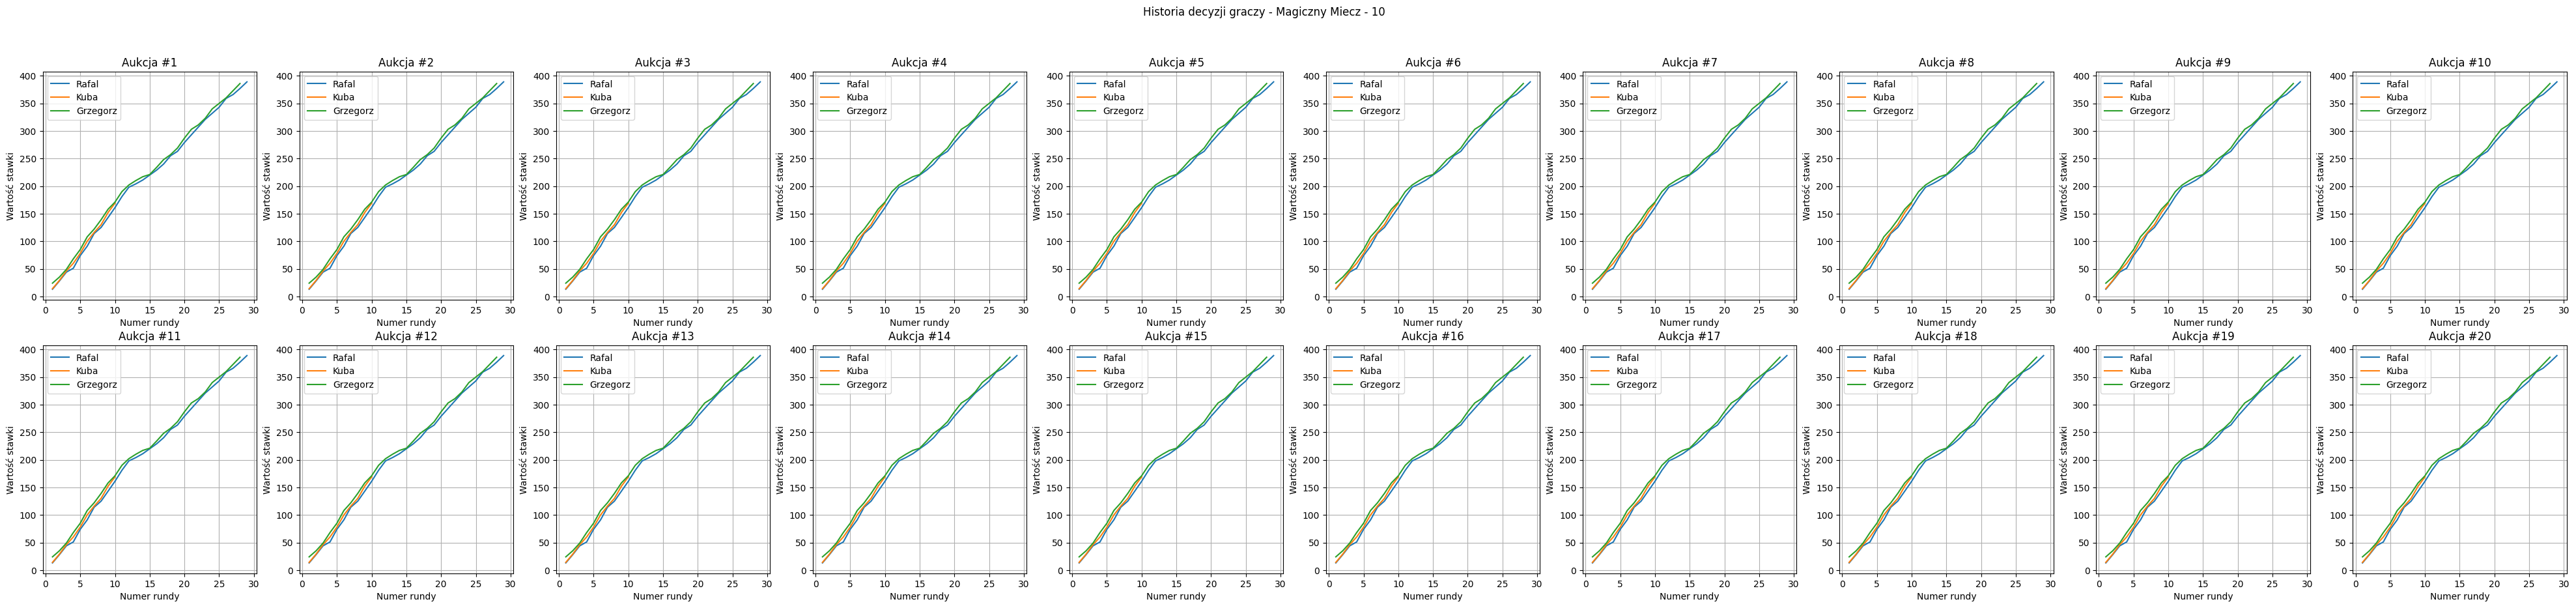

Auction #1
Rafal - Budget = 595 - Historia decyzji: [13, 28, 44, 51, 74, 91, 114, 125, 143, 161, 181, 198, 204, 211, 220, 229, 240, 255, 263, 279, 293, 307, 321, 332, 343, 359, 366, 377, 389]
Kuba - Budget = 176 - Historia decyzji: [14, 29, 46, 60, 78, 100, 116, 130, 152, 169]
Grzegorz - Budget = 378 - Historia decyzji: [24, 35, 49, 68, 85, 108, 122, 139, 158, 171, 190, 202, 210, 217, 221, 234, 248, 257, 269, 287, 303, 311, 323, 340, 350, 360, 373, 386]

Auction #2
Rafal - Budget = 595 - Historia decyzji: [13, 28, 44, 51, 74, 91, 114, 125, 143, 161, 181, 198, 204, 211, 220, 229, 240, 255, 263, 279, 293, 307, 321, 332, 343, 359, 366, 377, 389]
Kuba - Budget = 176 - Historia decyzji: [14, 29, 46, 60, 78, 100, 116, 130, 152, 169]
Grzegorz - Budget = 378 - Historia decyzji: [24, 35, 49, 68, 85, 108, 122, 139, 158, 171, 190, 202, 210, 217, 221, 234, 248, 257, 269, 287, 303, 311, 323, 340, 350, 360, 373, 386]

Auction #3
Rafal - Budget = 595 - Historia decyzji: [13, 28, 44, 51, 74, 91, 114, 

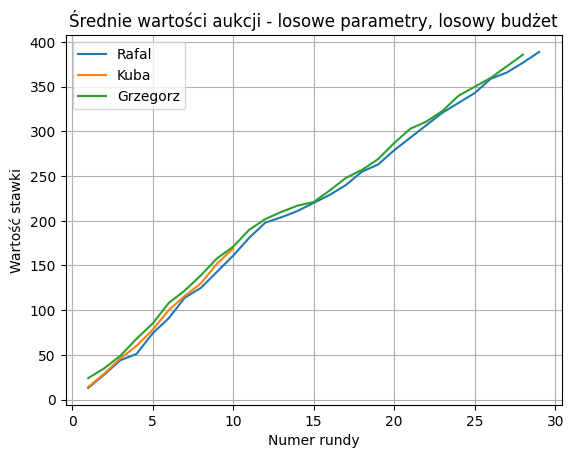

In [18]:
# Tworzenie aukcji i uruchomienie symulacji przy zmiennych parametrach graczy
auctions = []
auctions_number = 20
plot_rows = 2

plt.figure(figsize=(5*auctions_number/plot_rows, 5*plot_rows))

players = [
    Player("Rafal", int(random.uniform(10, 1000)), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),
    Player("Kuba", int(random.uniform(10, 1000)), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1)),
    Player("Grzegorz", int(random.uniform(10, 1000)), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1), random.uniform(0, 1))]


for i in range(auctions_number):
    plt.subplot(plot_rows, int(math.ceil(auctions_number/plot_rows)), i+1)
    #Atrybuty (imie, kapital, optymizm, cierpliwosc, agresywnosc, strategicznosc, ryzyko)
    auctions.append(Auction(i+1, players, item, asking_price))
    auctions[i].play()
    for player in auctions[i].players:
        print(f"{player.name} - budżet = {player.max_budget}, optymizm = {player.optimism}, cierpliwość = {player.patience}, agresywność = {player.aggressiveness}, strategiczność = {player.strategicness}, ryzyko {player.risk_tolerance}")
plt.suptitle(f"Historia decyzji graczy - {item} - {asking_price}")
plt.show()

avg_bid = count_avg_bid(auctions, auctions_number)

for i in range(len(auctions[0].players)):
    plt.plot(range(1, len(avg_bid[i]) + 1), avg_bid[i], label=auctions[0].players[i].name)
plt.xlabel('Numer rundy')
plt.ylabel('Wartość stawki')
plt.title(f'Średnie wartości aukcji - losowe parametry, losowy budżet')
plt.grid()
plt.legend()
plt.show()